In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
import pickle

In [88]:
knn_p = pickle.load(open("predictions/knn.pkl",'r'))
knn_oracle_p = pickle.load(open("predictions/knn_oracle.pkl",'r'))

ml_p = pickle.load(open("predictions/metric_knn.pkl",'r'))
mf_p = pickle.load(open("predictions/mf.pkl",'r'))

tensor_parafac_p = pickle.load(open("predictions/tensor-parafac.pkl",'r'))



In [89]:
gt_f, pred_f, rms, e = compute_rmse_fraction('hvac',knn_p['hvac']['energy'][1])

In [90]:
knn_oracle = {}
for appliance in knn_oracle_p:
    a, b, knn_oracle[appliance], e = compute_rmse_fraction(appliance, knn_oracle_p[appliance])

In [91]:
pd.Series(knn_oracle)

dw        0.417
fridge    1.222
hvac      6.583
mw        1.337
oven      0.763
wm        0.265
dtype: float64

In [70]:
knn_results = {}
for appliance in knn_p:
    knn_results[appliance] = {}
    for feature in ['energy_static','energy']:
        knn_results[appliance][feature] = 1000
        least_error = 1000
        best_n = None
        for neighbours in range(1, 10):
            pred = knn_p[appliance][feature][neighbours]
            gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)
            if rms < least_error:
                least_error = rms
                best_n = neighbours
        knn_results[appliance][feature] = least_error

In [71]:
pd.DataFrame(knn_results)

,dw,fridge,hvac,mw,oven,wm
energy,0.933,3.448,11.866,1.979,1.153,0.427
energy_static,0.830,3.424,12.968,2.072,1.162,0.453


In [11]:
pd.DataFrame(knn_results)

,dw,fridge,hvac,mw,oven,wm
energy,1.251474,4.094356,14.764718,1.893694,1.335658,3.946206
energy_static,1.183277,4.011048,15.795168,2.005482,1.341276,4.365505


In [73]:
ml_results = {}
for appliance in ml_p:
    ml_results[appliance] = {}
    for feature in ['energy_static','energy']:
        ml_results[appliance][feature] = 1000
        least_error = 1000
        best_n = None
        for neighbours in range(1, 10):
            pred = ml_p[appliance][feature][neighbours]
            gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)
            if rms < least_error:
                least_error = rms
                best_n = neighbours
        ml_results[appliance][feature] = least_error

In [74]:
pd.DataFrame(ml_results)

,dw,fridge,hvac,mw,oven,wm
energy,0.943,3.441,11.87,1.882,1.153,0.424
energy_static,0.920,3.377,12.37,1.957,1.154,0.426


In [13]:
pd.DataFrame(ml_results)

,dw,fridge,hvac,mw,oven,wm
energy,1.255604,4.071929,14.765291,1.890317,1.353210,3.939745
energy_static,1.311585,3.773661,15.328311,1.907030,1.368494,4.017028


In [14]:
mf_p[appliance][feature].keys()

['relative', 'absolute']

In [15]:
mf_results = {}
for appliance in mf_p:
    mf_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        for cost in ['relative','absolute']:
            mf_results[appliance][feature][cost] = {}
            least_error = 1000
            for lat in range(3, 9):
                print lat, cost, feature, appliance
                pred = mf_p[appliance][feature][cost][lat]
                gt_f, pred_f, rms,e  = compute_rmse_fraction(appliance, pred)
                if rms < least_error:
                    least_error = rms
                    best_k = lat
                    print best_k, least_error
            mf_results[appliance][feature][cost] = least_error

3 relative energy_static hvac
3 36.2328944975
4 relative energy_static hvac
4 18.9998544501
5 relative energy_static hvac
5 15.9625249868
6 relative energy_static hvac
7 relative energy_static hvac
8 relative energy_static hvac
3 absolute energy_static hvac
3 22.3747647523
4 absolute energy_static hvac
4 15.7207661481
5 absolute energy_static hvac
6 absolute energy_static hvac
7 absolute energy_static hvac
8 absolute energy_static hvac
3 relative energy hvac
3 17.7272544898
4 relative energy hvac
5 relative energy hvac
6 relative energy hvac
7 relative energy hvac
8 relative energy hvac
3 absolute energy hvac
3 21.6776332957
4 absolute energy hvac
4 19.2588138984
5 absolute energy hvac
6 absolute energy hvac
6 18.098560082
7 absolute energy hvac
7 16.8258546266
8 absolute energy hvac
3 relative energy_static wm
3 3.98155593557
4 relative energy_static wm
5 relative energy_static wm
6 relative energy_static wm
7 relative energy_static wm
7 3.87000186298
8 relative energy_static wm
3 abs

In [16]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['relative','absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [17]:
pd.DataFrame(mf_relative)

,dw,fridge,hvac,mw,oven,wm
energy,1.270505,6.407090,17.727254,1.899041,1.279598,3.937331
energy_static,1.212041,6.432692,15.962525,1.833703,1.301000,3.870002


In [18]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.204266,5.346804,16.825855,1.758091,1.156803,4.002757
energy_static,1.129433,4.439412,15.720766,1.819332,1.145724,3.993487


In [58]:
tensor_parafac_results = {}
for appliance in tensor_parafac_p:
    tensor_parafac_results[appliance] = {}
    least_error = 1000
    best_n = None
    for neighbours in range(1, 5):
        pred = tensor_parafac_p[appliance][neighbours]
        gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)
        if rms < least_error:
            least_error = rms
            best_n = neighbours
    tensor_parafac_results[appliance] = least_error

In [59]:
tensor_parafac_results

{'dw': 1.2088620988627041,
 'fridge': 5.9682405908247294,
 'hvac': 15.158401980727195,
 'mw': 2.0383558739066037,
 'oven': 1.4496016431668355,
 'wm': 0.47646276239150503}

In [57]:
tensor_parafac_results

{'dw': 1.2583428751416534,
 'fridge': 6.265161964416027,
 'hvac': 19.809316781313086,
 'mw': 1.8296873410079975,
 'oven': 1.39972461547974,
 'wm': 4.0115703444853033}

In [92]:
results_df ={}
results_df[('MF (Abs)','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF (Abs)','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn_results).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn_results).ix['energy_static']
results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']




In [93]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [94]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


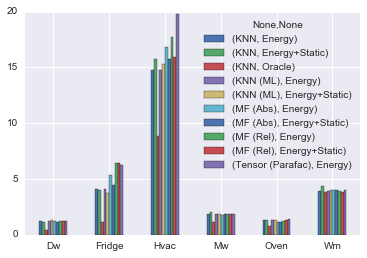

In [24]:
%matplotlib inline
out.T.plot(kind="bar",rot=0)

In [27]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [42]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

4


In [55]:
e[e>50]

hvac_6  2378     66.320
hvac_7  9931     55.425
hvac_8  1283     50.375
        4297     53.084
        5109    111.909
        7016     76.824
        9931     57.367
hvac_9  9931     54.087
dtype: float64

In [30]:
pred.ix[7641]

5     181.223
6     501.261
7     667.553
8     816.993
9     486.119
10    298.398
Name: 7641, dtype: float64

In [32]:
gt_f.ix[7641]

hvac_5     40.110
hvac_6     48.855
hvac_7     52.535
hvac_8     55.951
hvac_9     40.766
hvac_10    29.589
Name: 7641, dtype: float64

In [54]:
pred_f[pred_f>60].unstack().dropna()

hvac_6  2378    66.686
hvac_8  936     70.419
        1169    80.873
        3482    70.894
        4922    63.049
        5109    76.167
        7016    77.230
        9134    67.873
dtype: float64